## People Watching on the Wikipedia

This notebook shows how we can use data extracted from the wikipedia to look at life expectancy across occupation. The code to extract the data can be found at: https://github.com/DOsinga/wiki_import

Let's start by doing some reasonable imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

Import the data. You could do this from your own postgres instance if you ran your own wiki import, but if not, you can also just download the (zipped) csv from my website:

In [10]:
df = pd.read_csv('https://douwe.com/static/projects/wiki_import/wikipeople.zip', compression='zip')
df['life_span'] = df['year_died'] - df['year_born']
df

,person_name,view_count,word_count,year_born,year_died,gender,occupation,field,country_code,continent,life_span
0,"Charles V, Holy Roman Emperor",16964.0,10829,1500,1558.0,male,NaN,politics,BE,Europe,58.0
1,Reginald Pole,1438.0,2533,1500,1558.0,male,cardinals,politics,GB,Europe,58.0
2,Johann Stumpf (writer),35.0,477,1500,1578.0,male,writers,art,CH,Europe,78.0
3,Benvenuto Cellini,1887.0,3994,1500,1571.0,male,sculptors,art,IT,Europe,71.0
4,Bonaventure des Périers,45.0,641,1500,1544.0,male,novelists,art,FR,Europe,44.0
...,...,...,...,...,...,...,...,...,...,...,...
1426492,Kim Jun-young (footballer),NaN,60,1999,NaN,male,footballers,sport,KR,Asia,NaN
1426493,Dušan Bakić,NaN,59,1999,NaN,male,footballers,sport,ME,Europe,NaN
1426494,Christos Karadais,NaN,50,1999,NaN,male,footballers,sport,GR,Europe,NaN
1426495,Jang Hye-won,NaN,65,1999,NaN,female,actresses,art,KR,Asia,NaN


Let's see what the average life span over data set is.

In [93]:
df['life_span'].mean()

70.33103708396467

Let's have a look at how the year born and the year died correlate by plotting them against each other.

<AxesSubplot:xlabel='year_born', ylabel='year_died'>

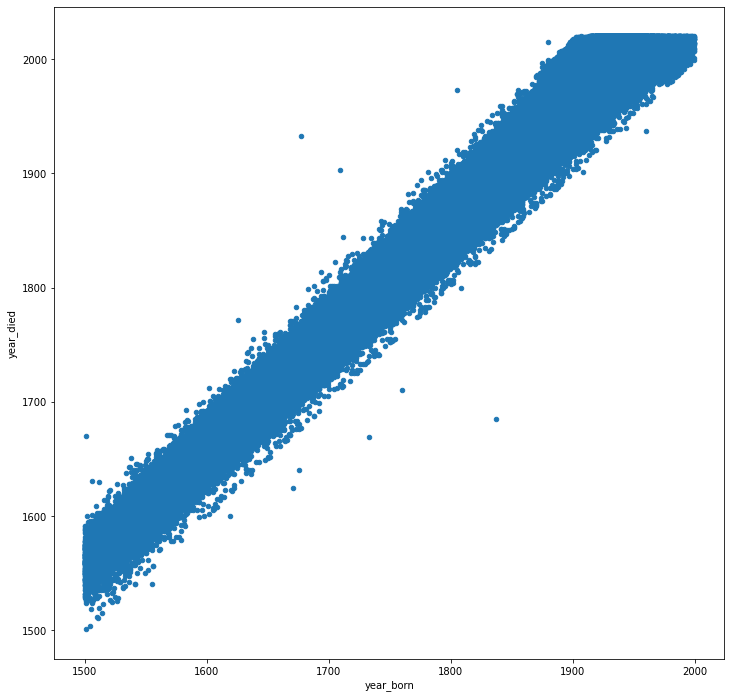

In [11]:
fig, ax = plt.subplots()
df.plot.scatter(x='year_born', 
                y='year_died',
                figsize=(12,12), 
                ax=ax)

Looks reasonable, other than that there are some unlikely outliers of people either living to an unrealistically mature age or worse, dying before they were born. When processing lots of data from Wikipedia you have to expect that you end up with a small number of parsing errors.

### By occupation

Now we'll group the data by occupation to get a rough idea of which occupations have the best life expectancy.

In [12]:
top_jobs = [*df.groupby('occupation').count().sort_values('life_span').reset_index()[['occupation', 'life_span']].tail(60)['occupation']]
life_expentancy = df.dropna().groupby('occupation')['life_span'].mean().sort_values()
life_expentancy

occupation
rappers             33.147727
kickboxers          45.160000
podcasters          47.333333
revolutionaries     52.531081
royalty             56.889101
                      ...    
neuroscientists     78.516484
conservationists    78.778351
biochemists         78.896074
geneticists         79.037037
billionaires        80.672515
Name: life_span, Length: 169, dtype: float64

Is this a reason not to become a rapper? Maybe. Then again, rapping hasn't been around for that long, so the average rapper on the wikipedia might still be alive, making the ones that are not the ones that die young. 

Similarly, there might be other reasons to become a billionaire, but in terms of life expectancy we're sampling from a biased set - it takes a lot of time to become a billionaire, so dying young and being a billionaire is hard!

We can confirm this by calculating the average year in which rappers are born and which billionaires are born:

In [14]:
df[df['occupation'] == 'rappers']['year_born'].mean(), df[df['occupation'] == 'billionaires']['year_born'].mean()

(1981.534693877551, 1948.4703277236492)

Let's explore this bias by plotting the life expectancy by year born. As you can see, life expectancy increases over time (as expected) until roughly 1924. At that point it starts to drop sharply because more and more people born in those years are still alive making the set of those who are not a more and more biased set

<AxesSubplot:xlabel='year_born'>

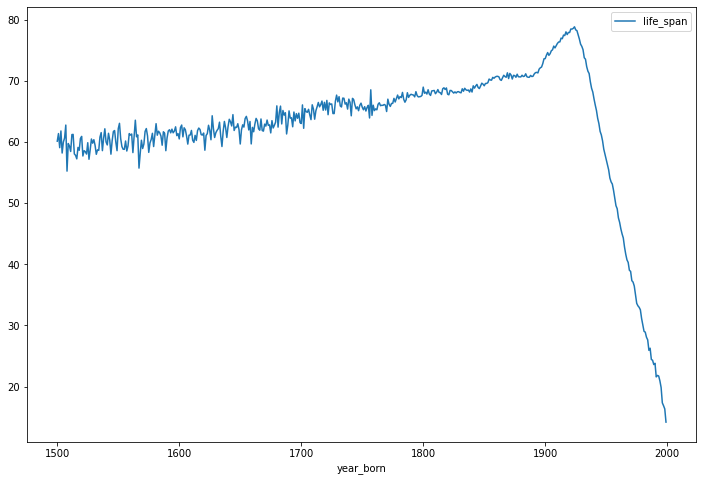

In [107]:
df.groupby('year_born').mean().reset_index().plot.line(x='year_born', y='life_span',
                    figsize=(12,8))

Too get a cleaner dataset, let's only look at the top 60 occupations by number of people so we root out the noise and let's look only at people born before 1924. This will remove rappers and billionaires from our dataset since, but will make things a lot clearer.

In [139]:
top_jobs = [*df.groupby('occupation').count().sort_values('life_span').reset_index()[['occupation', 'life_span']].tail(100)['occupation']]

In [15]:
life_expentancy = df[df['year_born'] < 1924].dropna().groupby('occupation')['life_span'].mean()
life_expentancy[top_jobs].reset_index().sort_values('life_span')

,occupation,life_span
15,aviators,63.282394
20,nobility,63.373665
37,soldiers,63.858780
51,poets,66.199107
17,boxers,66.240901
54,cricketers,68.616891
56,footballers,69.470898
53,composers,69.762383
57,painters,69.804434
43,journalists,70.504666


Turns out that aviators born before 1924 have a low life expectancy. Given the state of airplanes in those days, that is no real surprise of course. Nobility and soldiers also don't do very well, which again seems intuitive. Actresses live 4 years longer than actors, which roughly corresponds to the difference in life expectancy between males and females. Finally to live the longest, stay indoors and do something academic.

Feel free to play around with this. You can easily sample specific occupations to compare

In [121]:
life_expentancy[['singers', 'poets', 'painters', 'philosophers']]

occupation
singers         72.199946
poets           66.199107
painters        69.804434
philosophers    71.962105
Name: life_span, dtype: float64